In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split



In [26]:

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train_full = x_train_full / 255.0
x_test = x_test / 255.0
y_train_full = to_categorical(y_train_full, 10)
y_test = to_categorical(y_test, 10)


x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)



In [27]:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]



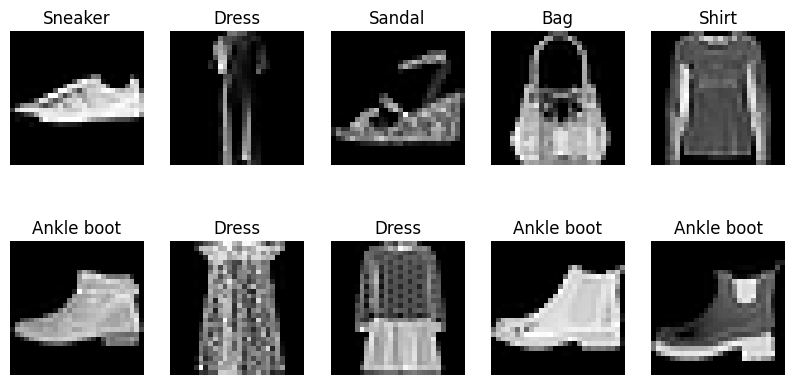

In [28]:
def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

plot_sample_images(x_train, y_train, class_names)

In [29]:

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compileer het model.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train het model.
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/10


/homes/jrgommers/year 3/myenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7653 - loss: 0.6762 - val_accuracy: 0.8517 - val_loss: 0.4089
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8604 - loss: 0.3887 - val_accuracy: 0.8718 - val_loss: 0.3580
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8738 - loss: 0.3377 - val_accuracy: 0.8701 - val_loss: 0.3578
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8830 - loss: 0.3154 - val_accuracy: 0.8724 - val_loss: 0.3568
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8894 - loss: 0.2966 - val_accuracy: 0.8717 - val_loss: 0.3502
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8958 - loss: 0.2788 - val_accuracy: 0.8810 - val_loss: 0.3319
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8990 - loss: 0.2686 - val_accuracy: 0.8853 - val_loss: 0.3154
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9051 - loss: 0.2542 - val_accurac

In [30]:
# **Voorspel met het model de testdata**
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step


In [31]:
# **Evalueer het model**
# Bereken nauwkeurigheid op de testset.
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8759 - loss: 0.3512  
Test loss: 0.3510066866874695
Test accuracy: 0.8754000067710876


In [32]:
def plot_predictions(images, true_labels, predicted_labels, class_names, start_index=0, num_images=10):
    plt.figure(figsize=(15, 7))
    for i in range(num_images):
        idx = start_index + i
        plt.subplot(2, 5, i+1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"True: {class_names[true_labels[idx]]}\nPred: {class_names[predicted_labels[idx]]}")
        plt.axis('off')
    plt.show()

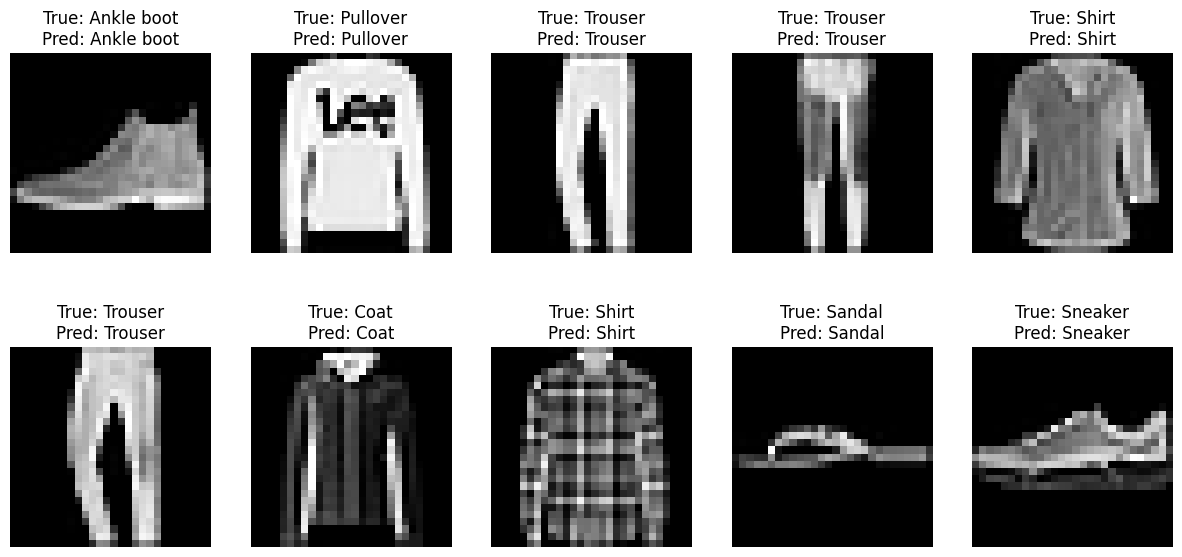

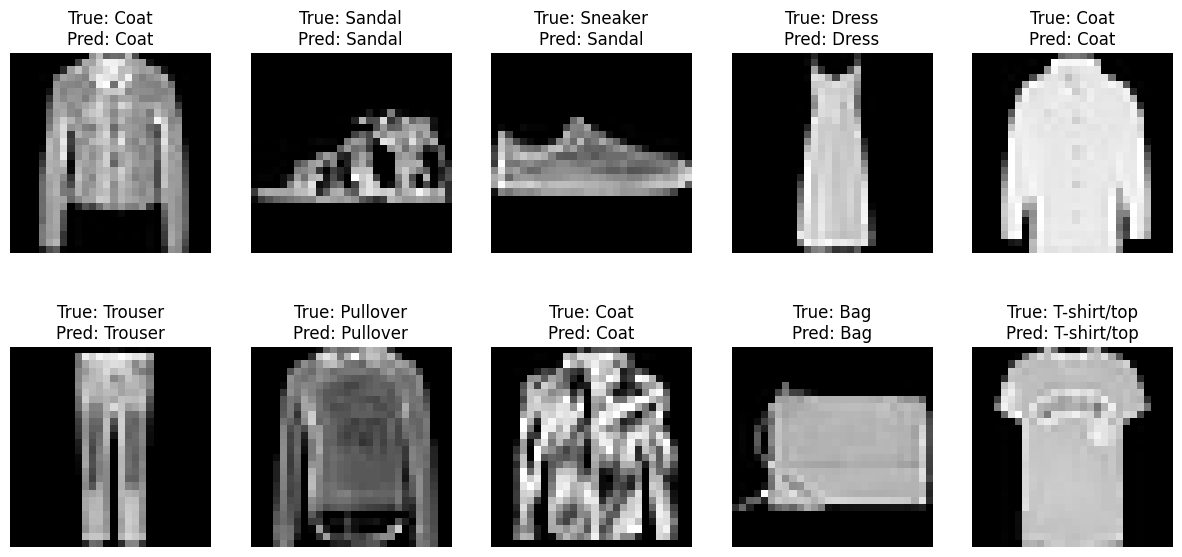

In [33]:
# Toon meer voorspellingen door de start_index en num_images te variëren.
plot_predictions(x_test, y_test_classes, predicted_classes, class_names, start_index=0, num_images=10)
plot_predictions(x_test, y_test_classes, predicted_classes, class_names, start_index=10, num_images=10)


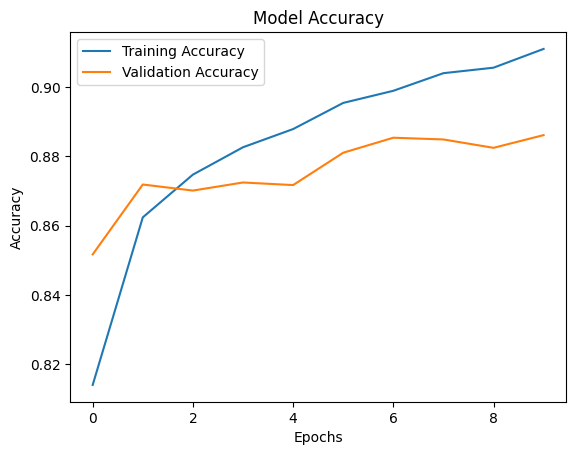

In [34]:
# **Extra: Visualiseer de trainingsgeschiedenis**
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

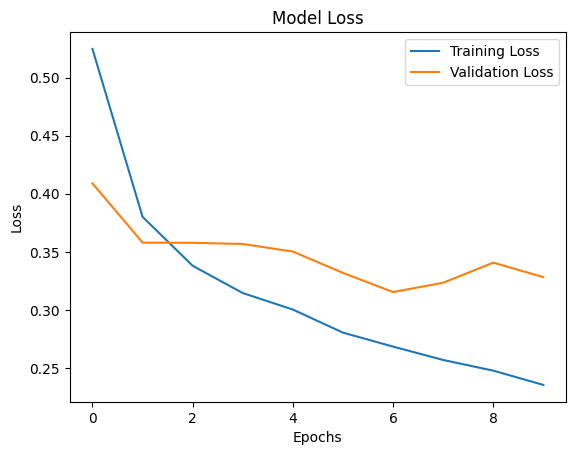

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

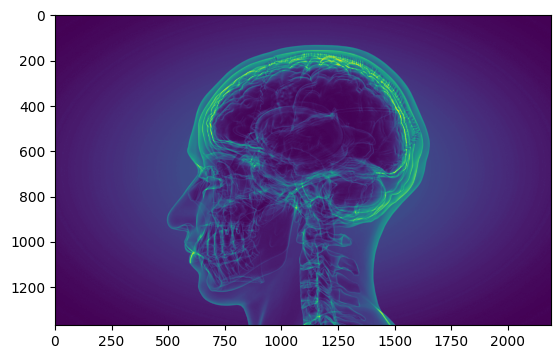

In [36]:
import cv2
im = cv2.imread("/homes/jrgommers/year 3/Deel_D/tumor.jpg")
im = im[:,:,1]
plt.imshow(im)
im = cv2.resize(im,(28,28), interpolation=cv2.INTER_AREA)

In [37]:

x = model.predict(np.array([im]))
sum(x[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


1.0

/tmp/ipykernel_801382/661702708.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(numbers,rotation= 90)


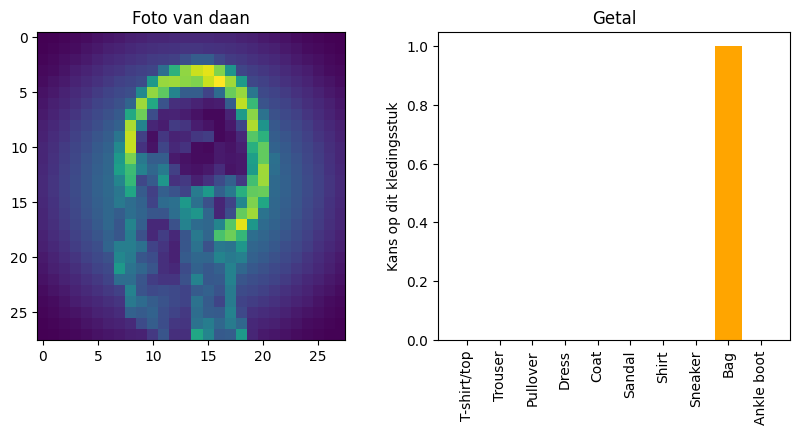

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

numbers = class_names
counts = x[0].tolist()

ax[1].bar(numbers, counts, color='orange')
ax[1].set_xticklabels(numbers,rotation= 90)
ax[1].set_ylabel('Kans op dit kledingsstuk')
ax[1].set_title('wat is het')
ax[0].set_title('Foto van daan')
ax[0].imshow(im)


plt.show()